In [1]:
from math import ceil
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

In [2]:
dt = 0.01
def plot_models(models, figsize=(8,8)):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection="3d")
    for piece in models:
            ax.plot(piece[:, 0].flatten(), piece[:, 1].flatten(), piece[:, 2].flatten(), lw=0.5)
    plt.draw()
    plt.show()

def plot_model(model, figsize=(5,5)):
    plot_models([model], figsize)


def calc_mean_lorenz(lorenz_models):
    return np.array([np.mean(lorenz_models[:,i,:], axis=0) for i in range(lorenz_models.shape[1])])


def calc_weighted_average_lorenz(lorenz_models, weights):
    return np.array([np.average(lorenz_models[:,i,:], axis=0, weights=weights) for i in range(lorenz_models.shape[1])])

def lorenz_step(coords,parameters, d =dt):
    rho, sigma, beta = parameters
    x, y, z = coords
    return coords + (np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])* dt)

def generate_lorenz(x=1, y=1, z=1, sigma=10.0, rho=28.0, beta=8.0/3.0, start=0.0, number_of_samples=10000, plot=False):
    size = number_of_samples
    if start:
        size += ceil(start/dt)

    coords = np.empty([size,3])

    # Set initial values
    coords[0] = [x,y,z]
    parameters = [rho, sigma, beta]
    for i in range(size - 1):
        coords[i+1] = lorenz_step(coords[i],parameters)
    coords= coords[-number_of_samples:]
    if plot:
        plot_model(coords)
    return coords

In [3]:
model_1_params = dict(
    x = 1,
    y = 1,
    z = 1,
    sigma = 13.25,
    rho = 19.0,
    beta = 3.5
)

model_2_params = dict(
    x = 1,
    y = 1,
    z = 1,
    sigma = 7.0,
    rho = 18.0,
    beta = 3.7
)


model_3_params = dict(
    x = 1,
    y = 1,
    z = 1,
    sigma = 6.5,
    rho = 38.0,
    beta = 1.7
)

m1 = generate_lorenz(**model_1_params)
m2 = generate_lorenz(**model_2_params)
m3 = generate_lorenz(**model_3_params)
lorenz_attr = generate_lorenz()

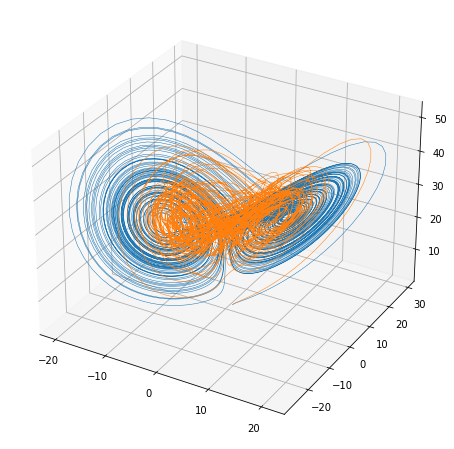

In [4]:
weighted_avg_model = calc_weighted_average_lorenz(
    np.array([m1, m2, m3]),
    [1,1,3]
)

plot_models([lorenz_attr,weighted_avg_model])

3d-var

In [5]:
from data_assimilation import assimilate_lorenz_weighted

def observator(weights):
    # return weights
    aa = calc_weighted_average_lorenz(
    np.array([m1, m2, m3]),
    list(np.ravel(weights)))
    # print(aa)
    return aa

In [6]:
result = assimilate_lorenz_weighted(np.array([1.,1.,1.]), lorenz_attr, observator)

[[ 1.        ]
 [ 1.        ]
 [ 1.        ]
 ...
 [ 6.81869433]
 [ 7.11628895]
 [24.5670366 ]]
  Intermediate CurrentState at the current iteration: [1. 1. 1.]
  Intermediate CurrentState at the current iteration: [0.60524681 0.57840371 1.81634949]
  Intermediate CurrentState at the current iteration: [0.87066216 0.86186723 1.26747061]
  Intermediate CurrentState at the current iteration: [0.85299767 0.87698737 1.26974993]
  Intermediate CurrentState at the current iteration: [0.81073337 0.91337882 1.27284043]
  Intermediate CurrentState at the current iteration: [0.81100874 0.91349509 1.27272996]
  Intermediate CurrentState at the current iteration: [0.81098466 0.91347629 1.2727424 ]
Calibration of 3 coefficients on 30000 measures
---------------------------------------------------------------------
Calibration resulting coefficients.: [0.81098466 0.91347629 1.2727424 ]


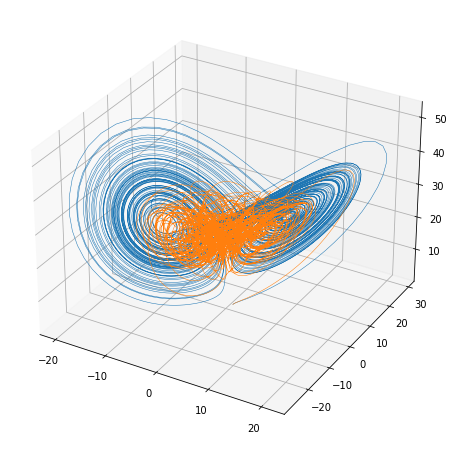

In [7]:
weighted_avg_model = calc_weighted_average_lorenz(
    np.array([m1, m2, m3]),
    result
)

plot_models([lorenz_attr,weighted_avg_model])